In [1]:
import sys
sys.path.insert(0,'/home/taylor/PycharmProjects/uav-classif')

from pathlib import Path
from torch.utils.data import DataLoader
from utils.dataset.SegmentationDataset import SegmentationDataset
from torchvision import transforms
from utils.dataset.transforms import _target_to_tensor
import torch
from tqdm.auto import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [2]:
train_data_path = Path('../train_input/data/train')
eval_data_path = Path('../train_input/data/eval')

In [3]:
train_ds = SegmentationDataset(train_data_path, 
                               transform=transforms.ToTensor(), 
                               target_transform=_target_to_tensor)
train_dl = DataLoader(train_ds, batch_size=16, num_workers=os.cpu_count())

In [4]:
totals = {}

for x, y in tqdm(train_dl):
    y = y.to(device)
    unique, counts = torch.unique(y, return_counts=True)
    for u, c in zip(unique, counts):
        u = u.detach().cpu().numpy()
        c = c.detach().cpu().numpy()
        totals[str(u)] = totals.get(str(u), 0) + c

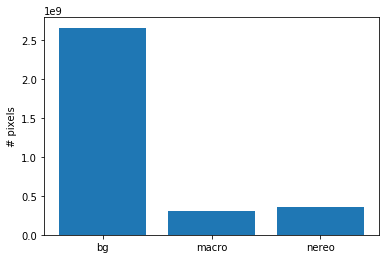

In [9]:
totals_sorted = np.array(sorted(totals.items(), key=lambda a: a[0]))[:,1].astype(np.int)
# plt.ylim(0, int(max(totals_sorted)))
plt.bar(['bg', 'macro', 'nereo'], totals_sorted)
plt.ylabel("# pixels")
plt.show()

In [7]:
totals_sorted = totals_sorted.astype(np.int)

In [8]:
for s, a in zip(['bg', 'macro', 'nereo'], totals_sorted):
    print("%5s: %.3f" % (s, a / sum(totals_sorted) * 100.))

   bg: 80.267
macro: 9.104
nereo: 10.630
